<a href="https://colab.research.google.com/github/Allen001822480/Info7374SpringTeam5/blob/Assignment2/assignment2_experiment6_FineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loaded model from disk


In [0]:
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import os
import keras
import pandas as pd

seed = 10

def read_img(img_name):
    img64 = Image.open(img_name).convert('RGB')
    img32 = img64.resize((32, 32),Image.ANTIALIAS)
    data = np.array(img32)
    return data

images = []
labels = []
dir = 'tiny-imagenet-200/train/'
i = 0
for folder in os.listdir(dir):
    folderpath = dir + folder +'/images/'
    for file in os.listdir(folderpath):
        if file.endswith('.JPEG'):
            filedir = folderpath + file
            images.append(read_img(filedir))
            labels.append(i)
    i = i+1

np.random.seed(seed)
num_classes = 200
x = np.array(images)
y = np.array(labels)
y = keras.utils.to_categorical(y, num_classes)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed)

In [3]:
for i in range(6):
    loaded_model.pop()
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
__________

In [4]:
# Freeze the layers except the last 5 layers
for layer in loaded_model.layers[:-5]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in loaded_model.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.Conv2D object at 0x7f4abcdaee10> False
<keras.layers.core.Activation object at 0x7f4abcdba550> False
<keras.layers.normalization.BatchNormalization object at 0x7f4abcdba2b0> False
<keras.layers.convolutional.Conv2D object at 0x7f4abcdba390> False
<keras.layers.core.Activation object at 0x7f4abcdba358> False
<keras.layers.normalization.BatchNormalization object at 0x7f4ab4cd2f28> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4ab4cf10b8> False
<keras.layers.core.SpatialDropout2D object at 0x7f4ab4cd20f0> False
<keras.layers.convolutional.Conv2D object at 0x7f4ab4bbc320> False
<keras.layers.core.Activation object at 0x7f4ab4b7c898> False
<keras.layers.normalization.BatchNormalization object at 0x7f4ab4b11a90> False
<keras.layers.convolutional.Conv2D object at 0x7f4ab4b6f5c0> False
<keras.layers.core.Activation object at 0x7f4ab4b11b00> False
<keras.layers.normalization.BatchNormalization object at 0x7f4ab4a45400> False
<keras.layers.pooling.MaxPooling2

In [5]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(loaded_model)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(200, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 2, 2, 128)         288800    
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               205000    
Total params: 1,019,112
Trainable params: 878,152
Non-trainable params: 140,960
_________________________________________________________________


In [13]:
# Train the model
model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 90000 samples, validate on 10000 samples
Epoch 1/100
90000/90000 [==============================] - 14s 155us/step - loss: 5.0069 - acc: 0.0294 - val_loss: 4.6133 - val_acc: 0.0605
Epoch 2/100
90000/90000 [==============================] - 12s 135us/step - loss: 4.4755 - acc: 0.0709 - val_loss: 4.3735 - val_acc: 0.0928
Epoch 3/100
90000/90000 [==============================] - 12s 135us/step - loss: 4.2927 - acc: 0.0952 - val_loss: 4.2204 - val_acc: 0.1081
Epoch 4/100
90000/90000 [==============================] - 12s 135us/step - loss: 4.1848 - acc: 0.1111 - val_loss: 4.1172 - val_acc: 0.1259
Epoch 5/100
90000/90000 [==============================] - 12s 135us/step - loss: 4.1038 - acc: 0.1242 - val_loss: 4.0644 - val_acc: 0.1289
Epoch 6/100
90000/90000 [==============================] - 12s 135us/step - loss: 4.0464 - acc: 0.1328 - val_loss: 4.0377 - val_acc: 0.1344
Epoch 7/100
90000/90000 [==============================] - 12s

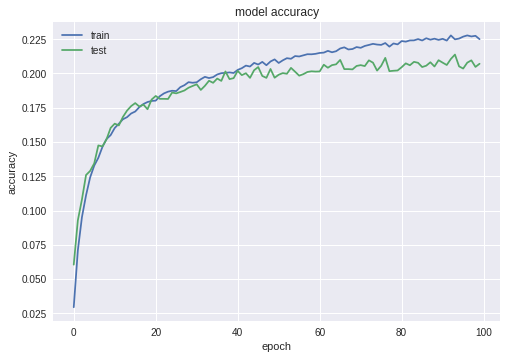

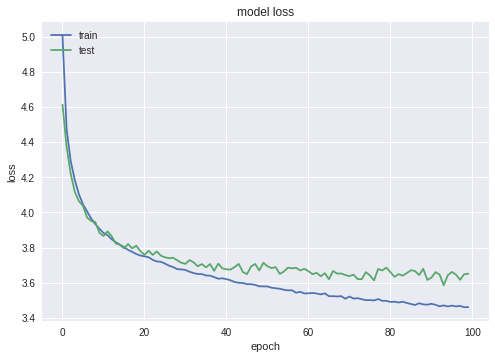

In [15]:
import matplotlib.pyplot as plt

def plothistory(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    
plothistory(history)

In [0]:
def getResult(seed, layer):
  # load json and create model
  json_file = open('model.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
  # load weights into new model
  loaded_model.load_weights("model.h5")
  
  for i in range(6):
    loaded_model.pop()
  loaded_model.summary()
  
  print("Loaded model from disk")
  
  images = []
  labels = []
  dir = 'tiny-imagenet-200/train/'
  i = 0
  for folder in os.listdir(dir):
      folderpath = dir + folder +'/images/'
      for file in os.listdir(folderpath):
          if file.endswith('.JPEG'):
              filedir = folderpath + file
              images.append(read_img(filedir))
              labels.append(i)
      i = i+1

  np.random.seed(seed)
  num_classes = 200
  x = np.array(images)
  y = np.array(labels)
  y = keras.utils.to_categorical(y, num_classes)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed)
  
  # Freeze the layers except the last 4 layers
  for layer in loaded_model.layers[:layer]:
      layer.trainable = False
  # Check the trainable status of the individual layers
  for layer in loaded_model.layers:
      print(layer, layer.trainable)
      
  # Create the model
  model = models.Sequential()

  # Add the vgg convolutional base model
  model.add(loaded_model)

  # Add new layers
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(200, activation='softmax'))
  
  # Train the model
  model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
                loss='categorical_crossentropy',
                metrics=['acc'])

  history = model.fit(x_train,
                      y_train,
                      epochs=100,
                      batch_size=128,
                      validation_data=(x_test,y_test))
  return history

In [7]:
history2 = getResult(10,-8)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
__________

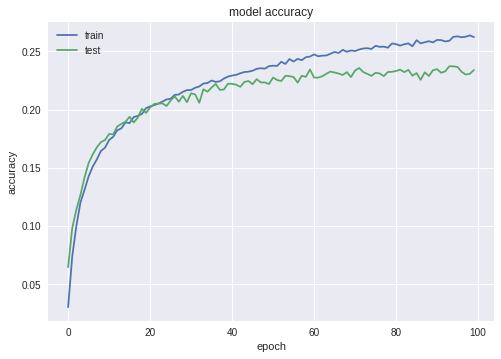

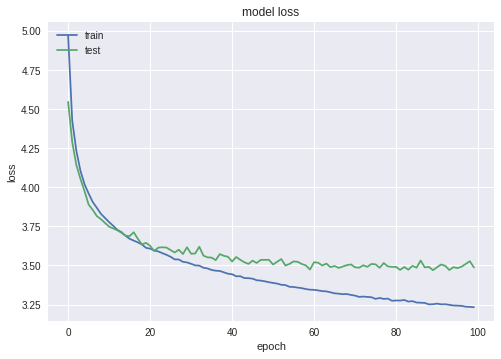

In [9]:
import matplotlib.pyplot as plt

def plothistory(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
plothistory(history2)

In [19]:
history3 = getResult(10,-13)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
__________

In [0]:
plothistory(history3)

In [25]:
count = 0
# Freeze the layers except the last 4 layers
for layer in loaded_model.layers:
    layer.trainable = True
    count = count+1
# Check the trainable status of the individual layers
for layer in loaded_model.layers:
    print(layer, layer.trainable)
print(count)

<keras.layers.convolutional.Conv2D object at 0x7febf22f7e10> True
<keras.layers.core.Activation object at 0x7febf2303550> True
<keras.layers.normalization.BatchNormalization object at 0x7febf23032b0> True
<keras.layers.convolutional.Conv2D object at 0x7febf2303390> True
<keras.layers.core.Activation object at 0x7febf2303358> True
<keras.layers.normalization.BatchNormalization object at 0x7febea21df28> True
<keras.layers.pooling.MaxPooling2D object at 0x7febea23d0b8> True
<keras.layers.core.SpatialDropout2D object at 0x7febea21d0f0> True
<keras.layers.convolutional.Conv2D object at 0x7febea107320> True
<keras.layers.core.Activation object at 0x7febea0c7898> True
<keras.layers.normalization.BatchNormalization object at 0x7febea05ca90> True
<keras.layers.convolutional.Conv2D object at 0x7febea0bb5c0> True
<keras.layers.core.Activation object at 0x7febea05cb00> True
<keras.layers.normalization.BatchNormalization object at 0x7febe9f903c8> True
<keras.layers.pooling.MaxPooling2D object at 0x

In [10]:
history0 = getResult(10,-24)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
__________

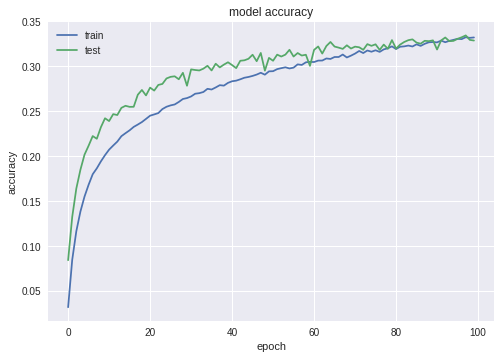

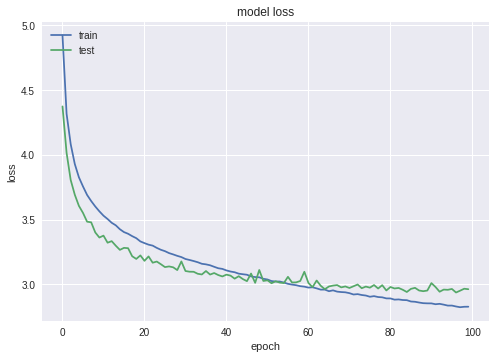

In [11]:
plothistory(history0)